In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('museums_separated.csv')

In [3]:
# Check out size of dataframe
df.shape

(11862, 8)

In [4]:
# Look at the first 5 rows and see what the features are. 
df.head()

,Museum.Name,Legal.Name,Museum.Type,State..Administrative.Location.,Region.Code..AAM.,Is.Museum,Tax.Year,Annual.Revenue
0,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,AK,6,True,2013,1100472.0
1,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",AK,6,False,2013,1323742.0
2,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,AK,6,True,2013,729080.0
3,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,AK,6,True,2013,1100472.0
4,ALASKA JEWISH MUSEUM,ALASKA JEWISH HISTORICAL MUSEUM AND CULTURAL C...,GENERAL MUSEUM,AK,6,True,2013,68748.0


In [5]:
# Check for unique values in Tax Year
df['Tax.Year'].unique()

array([2013])

In [6]:
# Drop Tax Year since all years are 2013
df = df.drop('Tax.Year', axis=1)

In [7]:
# Check to see how many entries are in the category of Arboretum, Botanical Garden or Nature Center.
len(df[df['Museum.Type'] == 'ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER'])

439

In [16]:
# Let's make a new dataframe with just the Arboretums, Botanical Gardens & Nature Centers.
gardens = df[df['Museum.Type'] == 'ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER']
# We'll drop the Legal Name, Museum Type (all the same now), and Is Museum (also all the same now).
gardens = gardens.drop(['Legal.Name','Museum.Type', 'Is.Museum'], axis=1)

In [17]:
gardens.head()

,Museum.Name,State..Administrative.Location.,Region.Code..AAM.,Annual.Revenue
1,ALASKA BOTANICAL GARDEN,AK,6,1323742.0
9,ALASKA WILDLIFE CONSERVATION CENTER,AK,6,2793744.0
18,CENTER FOR ALASKAN COASTAL STUDIES,AK,6,908922.0
25,EAGLE RIVER NATURE CENTER,AK,6,268677.0
35,KACHEMAK HERITAGE LAND TRUST,AK,6,287801.0


In [20]:
# Make column names simpler.
new_cols = ['Name', 'State', 'Region', 'Annual_Revenue']

gardens.columns = new_cols

In [22]:
# Check to make sure it's nice and tidy. 
gardens.head()

,Name,State,Region,Annual_Revenue
1,ALASKA BOTANICAL GARDEN,AK,6,1323742.0
9,ALASKA WILDLIFE CONSERVATION CENTER,AK,6,2793744.0
18,CENTER FOR ALASKAN COASTAL STUDIES,AK,6,908922.0
25,EAGLE RIVER NATURE CENTER,AK,6,268677.0
35,KACHEMAK HERITAGE LAND TRUST,AK,6,287801.0


In [60]:
gardens.Region.unique()

array([6, 3, 5, 1, 2, 4])

In [112]:
There are a few outiliers in TX and FL that have a different region code. I changed them all to be the same for clarity.
gardens.loc[gardens['State'] == 'TX', 'Region'] = 5
gardens.loc[gardens['State'] == 'FL', 'Region'] = 3

SyntaxError: invalid syntax (2442138387.py, line 1)

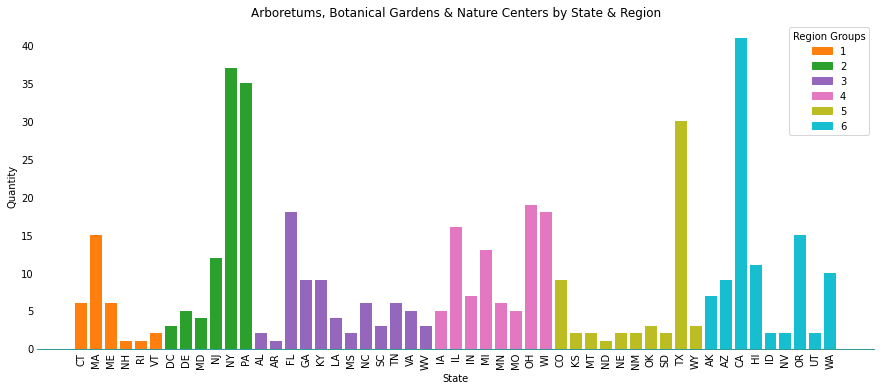

In [94]:
# Group gardens by state and region.
region_counts = gardens.groupby(['State', 'Region'])['Name'].count().reset_index()

# Sort regions numerically.
region_counts['Region'] = region_counts['Region'].astype(int)
region_counts = region_counts.sort_values(['Region', 'State'])

# Define color map based on count values.
colors = cm.get_cmap('tab10', len(region_counts))

# Create a dictionary that maps count values to colors.
color_dict = dict(zip(region_counts['Region'], colors(range(len(region_counts)))))

# Create a list of colors for each region.
colors = [color_dict[region] for region in region_counts['Region']]

# Create a bar chart of the region counts with custom colors.
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(region_counts['State'], region_counts['Name'], color=colors)

# Customize the plot.
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('teal')
ax.spines['left'].set_color('none')
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Quantity')
plt.title('Arboretums, Botanical Gardens & Nature Centers by State & Region')

# Create legend.
legend_handles = []
for region, color in color_dict.items():
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=color, label=str(region)))
plt.legend(handles=legend_handles, title='Region Groups')

plt.show()


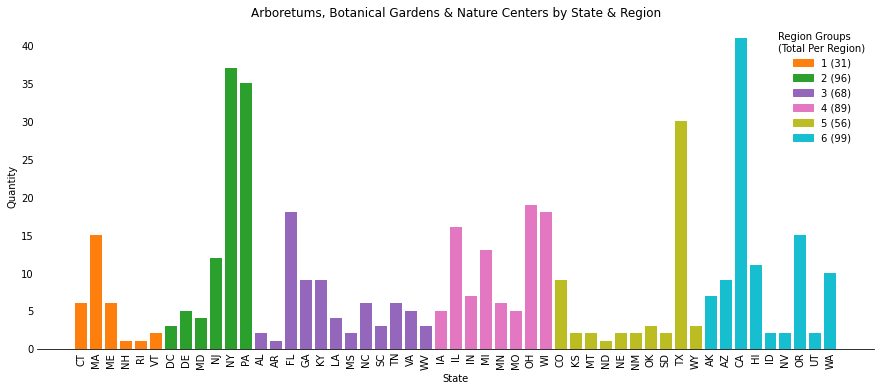

In [132]:
# Group gardens by state and region.
region_counts = gardens.groupby(['State', 'Region'])['Name'].count().reset_index()

# Sort regions numerically.
region_counts['Region'] = region_counts['Region'].astype(int)
region_counts = region_counts.sort_values(['Region', 'State'])

# Define color map based on count values.
colors = cm.get_cmap('tab10', len(region_counts))

# Create a dictionary that maps count values to colors.
color_dict = dict(zip(region_counts['Region'], colors(range(len(region_counts)))))

# Create a list of colors for each region.
colors = [color_dict[region] for region in region_counts['Region']]

# Create a bar chart of the region counts with custom colors.
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(region_counts['State'], region_counts['Name'], color=colors)

# Customize the plot.
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('none')
ax.tick_params(axis='both', which='both', length=0, labelsize=10)

plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Quantity')
plt.title('Arboretums, Botanical Gardens & Nature Centers by State & Region')

# Create legend.
legend_handles = []
for region, color in color_dict.items():
    region_count = region_counts[region_counts['Region'] == region]['Name'].sum()
    label = f'{region} ({region_count})'
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=color, label=label))
plt.legend(handles=legend_handles, title='Region Groups\n(Total Per Region)', frameon=False)

# Save plot to jpeg
plt.savefig('gardens.jpg', format='jpeg')
plt.show()